In [33]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import pydotplus
import graphviz
import time
%matplotlib inline

In [3]:
pulsar = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/pulsar_stars.csv', encoding='Latin-1')

In [4]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [34]:
pulsar.drop(['target_class'], axis = 1)
pulsar_target = pulsar.loc[:, pulsar.columns.intersection (['target_class'])]
pulsar_target['target_class'] = pulsar_target['target_class'].map({0:'not_star', 1:'pulsar_star'}) 

start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3
)
decision_tree.fit(pulsar, pulsar_target)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.029979228973388672 seconds ---


In [28]:
print(cross_val_score(decision_tree, pulsar, pulsar_target, cv = 5))

[0.94553073 0.97597765 0.97290503 0.97346369 0.96981554]


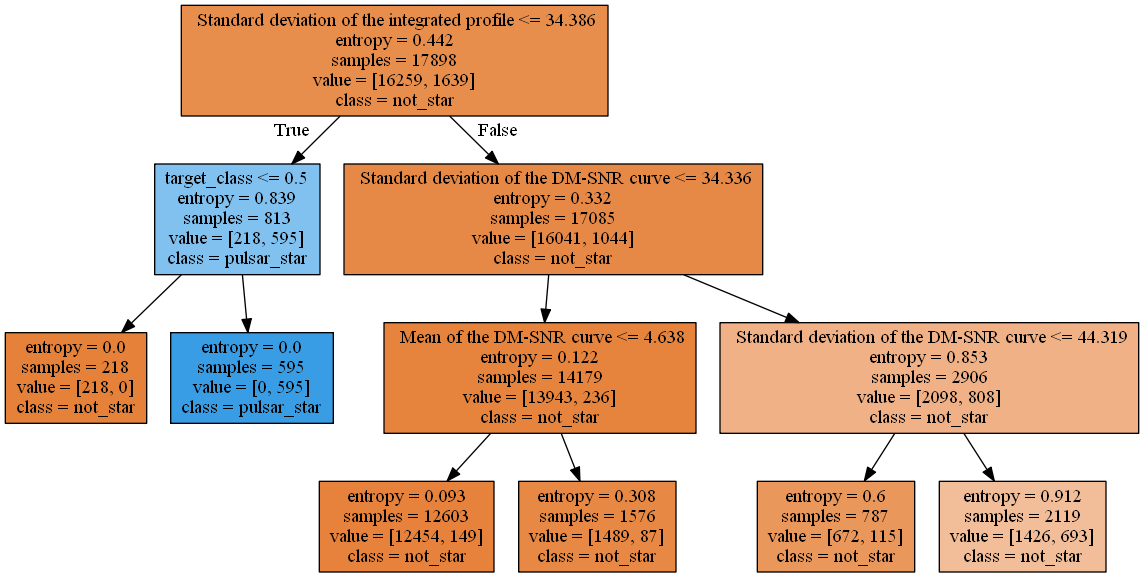

In [32]:
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=pulsar.columns,
    class_names=['not_star', 'pulsar_star'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [38]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()
X = pulsar.drop('target_class', 1)
Y = pulsar['target_class']

print(cross_val_score(rfc, X, Y, cv=5))

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rabia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.97569832 0.98044693 0.97821229 0.97541899 0.97820011]
--- 1.3672189712524414 seconds ---


It is clear that random forest comes with  better cross validation result with low variablity of scores comare to decision tree but in terms of run time, it takes 46 times the time it took the decision tree model.